<a href="https://colab.research.google.com/github/Gabrielsandbox/Python-Codebase/blob/main/GraphVisualizacaoeDashboards_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Durante a análise de dados nós temos:
# Análise Exploratória:
#
# - Relações
# - Limites
# - Outliers
# - Tendências
# - Padrões
#
# Fase Explanatória
#
# - Conclusões
# - Evidências
# - Sofisticação


In [ ]:
#Formas de organizar informação:
#
# - Localização
# - Alfabeticamente
# - Tempo
# - Categoria
# - Hierárquica

In [ ]:
# Causa e Efeito - Variáveis independentes e Variáveis independentes
# Em um gráfico :
#
#            |
#            |
#     Efeito |
#            |
#            |___________________
#                   Causa

In [ ]:
#Características de um gráfico e cores : Data-Ink Ratio (Edward Tufte) & ACCENT (D.A.Burn)

In [ ]:
#Tipos de gráficos
#   Gráficos de Linhas
#     - Dados contínuos, Evolução, Series Temporais com tempo no eixo horizontal e dimensões no vertical,
#       Suporta várias categorias.
#
#   Gráfico de Setores (Impreciso visualmente)
#
#   Gráficos de dispersão (Mostrar relação entre duas variáveis)
#     - Bubble chart (Adiciona uma dimensão + uma variável categórica)
#     - Small multiples - Varios gráficos, varia os dados mas mantem o design
#
#   Distribuição dos dados
#     - Histograma (Uma variável)
#     - Boxplot (Varias variáveis)
#
#   Heat Map
#
#   Tree Map (Comparar variáveis categóricas)
#

In [ ]:
#Checklist 1 - Tipos de elementos
#
# Está usando o elemento gráfico adequado?
# Não há excesso de elementos decoratívos?
# Não há mais do que 7 elementos na dashboard?

In [ ]:
#Checklist 2 - Dados
#
#
# Dados estão no contexto certo?
# Dados não apresentam um excesso de detalhes?
# Dados mais importantes estão destacados
# Não há mais do que 20 instâncias (linhas) por elemento (gráfico)?
# Existe excesso de elementos não relacionados a gráficos?

In [ ]:
#Checklist 3 - Painel
#
#
# Não transcende as dimensões da tela?
# Não utiliza medidas ineficientes?
# Exist um único assunto no dashboard?
# Está destacando informação mais relevante nas áreas de ênfase?
# Está mantida a proporção 1/6 entre eixos?
# Existem referências de comparação?
#

In [ ]:
#Checklist 4 - Design
#
#
# Foi considerado o ranking de percepção do cérebro?
# As cores escolhidas são suaves?
# Foram evitadas linhas de grade e moiré vibration?
# Foram feitas considerações sobre daltonismo?
#

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/content/trees.csv')

data.shape

In [ ]:
data.head()

# **Gráficos**

In [ ]:
#Histograma - Distribuição dos dados
h = np.histogram(data.iloc[:,1], bins = 6)
h

In [ ]:
plt.hist(data.iloc[:,1], bins = 6)
plt.title('Trees')
plt.ylabel('Frequency')
plt.xlabel('Height')

In [ ]:
#Gráfico de densidade

import seaborn as srn
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('/content/trees.csv')
dataset.head()

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8


In [ ]:
#Histograma com linha de destribuição de frequência, com 6 barras(bins)
#kde = linha de densidade (True/False)
srn.histplot(dataset.iloc[:,1], kde=True, bins = 6, color='green').set(title='Trees')

In [ ]:
#Método kdeplot para densidade
srn.kdeplot(dataset.iloc[:,1], color='green').set(title='Trees KDE')

Text(0, 0.5, 'Volume')

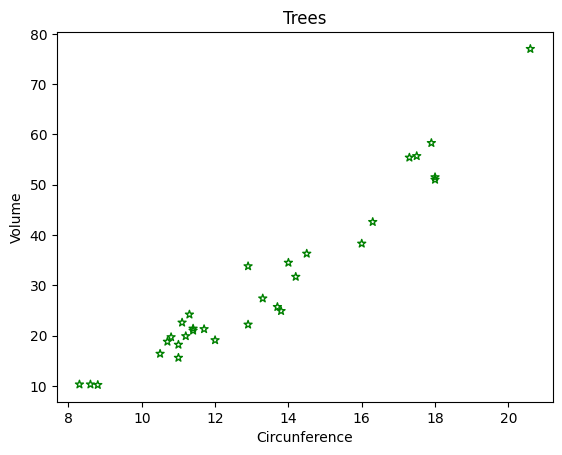

In [ ]:
#Gráficos de dispersão

plt.scatter( x=dataset.Girth, y=dataset.Volume, color='green', facecolors='none', marker='*')
plt.title('Trees')
plt.xlabel('Circunference')
plt.ylabel('Volume')

Text(0, 0.5, 'Volume')

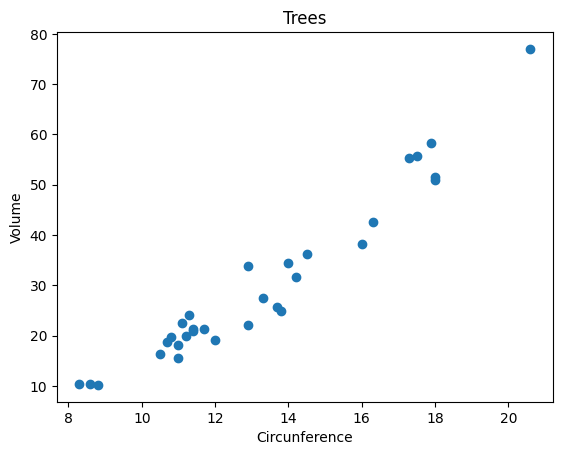

In [ ]:
#Default visual
plt.scatter( x=dataset.Girth, y=dataset.Volume)
plt.title('Trees')
plt.xlabel('Circunference')
plt.ylabel('Volume')

<Axes: xlabel='Girth', ylabel='Volume'>

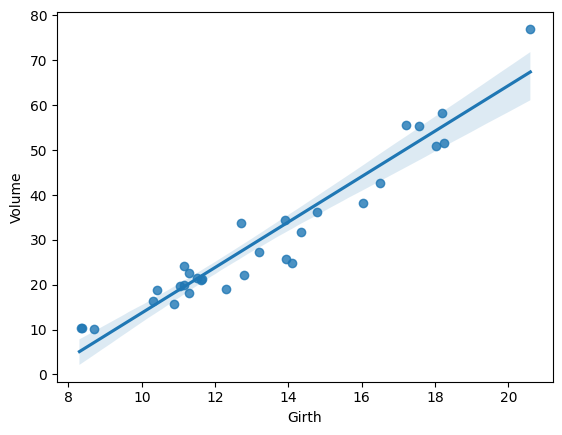

In [ ]:
#jitter = tremulação = afastamento dos dados para previnir sobreposição de datapoints
#fit_reg = aplica linha de tendência (True/False)
srn.regplot( x=dataset.Girth, y=dataset.Volume, data=dataset, x_jitter=0.3, fit_reg=True)

In [ ]:
dataset = pd.read_csv('/content/co2.csv')
dataset.head()

,Plant,Type,Treatment,conc,uptake
0,Qn1,Quebec,nonchilled,95,16.0
1,Qn1,Quebec,nonchilled,175,30.4
2,Qn1,Quebec,nonchilled,250,34.8
3,Qn1,Quebec,nonchilled,350,37.2
4,Qn1,Quebec,nonchilled,500,35.3


In [ ]:
x = dataset.conc
y = dataset.uptake

In [ ]:
unique_treatment = list(set(dataset.Treatment))
unique_treatment

['nonchilled', 'chilled']

In [ ]:
for i in range(len(unique_treatment)):
  index = dataset.Treatment == unique_treatment[i] #????????????!!!
  print(index)
  plt.scatter(x[index], y[index], label=unique_treatment[i])
plt.legend(loc = 'lower right')

(array([ 5., 10.,  4.,  4.,  2.,  0.,  4.,  1.,  0.,  1.]),
 array([10.2 , 16.88, 23.56, 30.24, 36.92, 43.6 , 50.28, 56.96, 63.64,
        70.32, 77.  ]),
 <BarContainer object of 10 artists>)

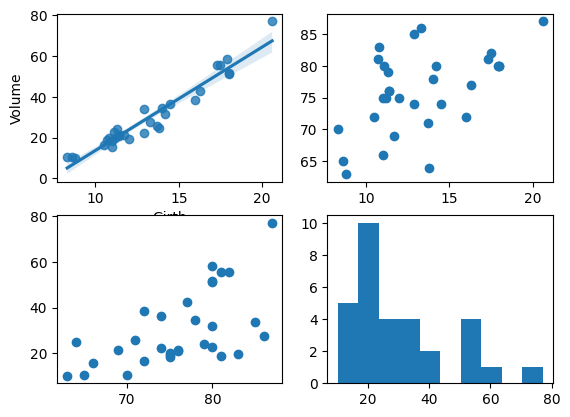

In [ ]:
#Divisão de telas

plt.figure(1)
plt.subplot(2, 2, 1)
srn.regplot( x=dataset.Girth, y=dataset.Volume, data=dataset, x_jitter=0.0, fit_reg=True) #problem with legend
plt.subplot(2, 2, 2)
plt.scatter(dataset.Girth, dataset.Height)
plt.subplot(2, 2, 3)
plt.scatter(dataset.Height, dataset.Volume)
plt.subplot(2, 2, 4)
plt.hist(dataset.Volume)

In [ ]:
#Boxplot

